# IoT & Smart Analytics
## A Program by IIIT-H and TalentSprint

## Learning Objectives
At the end of the experiment, participants will be able to : 
* understand & implement pipeline of transforms
* understand & use non linear SVM classifier

#### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

### Generating & visualizing the dataset for classification

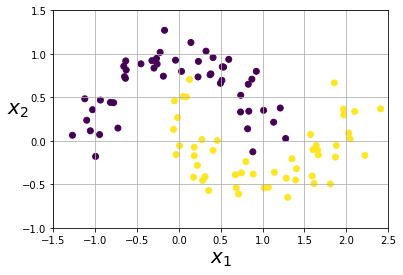

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
axes=[-1.5, 2.5, -1, 1.5] # how?
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis(axes)
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()

In [ ]:
X

In [ ]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
## To get a sense of the data --> This step is not required
data=pd.DataFrame(np.hstack((X,y[:,np.newaxis])),columns=['X1','X2','Label'])
data.head()

,X1,X2,Label
0,1.613838,-0.491151,1.0
1,0.089847,0.504391,1.0
2,0.747210,-0.369111,1.0
3,-1.101745,0.236856,0.0
4,-0.728715,0.146523,0.0


#### Polynomical transformation

In [ ]:
poly = PolynomialFeatures(3)
X1=poly.fit_transform(X)

#### StandardScalarTransformation

In [ ]:
scaler = StandardScaler()
scaler.fit(X1)
# transformation 
X1=scaler.transform(X1)

###  Using  linear SVM classification
* Support vector classifier with linear kernel: Kernalized SVM
* Linear support vector classifier
  ###### We can use any one from above. Run any one cell from below:

In [ ]:
# Support vector classifier with linear kernel
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=10, random_state=42)
svm_clf.fit(X1, y)

SVC(C=10, kernel='linear', random_state=42)

In [ ]:
# Linear support vector classifier
from sklearn.svm import LinearSVC
svm_clf=LinearSVC(C=10, random_state=42,max_iter=2000)
svm_clf.fit(X1, y)

LinearSVC(C=10, max_iter=2000, random_state=42)

## Understanding the visualization

In [ ]:
x=np.linspace(-3,3,7)
print(x,'\n')
yz=np.linspace(-3,3,7)
print(y,'\n')

[-3. -2. -1.  0.  1.  2.  3.] 

[-3. -2. -1.  0.  1.  2.  3.] 



In [ ]:
xs,ys=np.meshgrid(x,yz)
print('xs : \n',xs,'\n')
print('ys : \n',ys,'\n')

In [ ]:
x1=xs.ravel()
print(x1,'\n')
y1=ys.ravel()
y1

[-3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.
  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3.
 -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3.] 



array([-3., -3., -3., -3., -3., -3., -3., -2., -2., -2., -2., -2., -2.,
       -2., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])

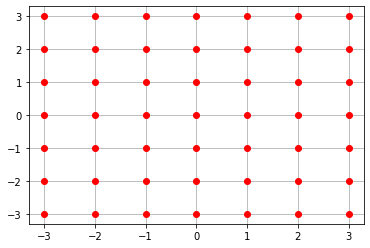

In [ ]:
plt.plot(x1,y1,'ro')
plt.grid(True)
#plt.axhline()
#plt.axvline()

In [ ]:
XX = np.c_[x1.ravel(), y1.ravel()]
XX

### Visualization of Decision boundary

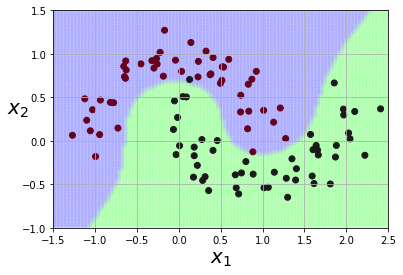

In [ ]:
## Getting 10,000 equilspaced data points in the domain and tranforming them to match with input feature for training
axes=[-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100) ## 100 Points on x axis
x1s = np.linspace(axes[2], axes[3], 100) ## 100 Points on y axis
x0, x1 = np.meshgrid(x0s, x1s)
XX = np.c_[x0.ravel(), x1.ravel()]
##Transformation steps
XX=poly.fit_transform(XX)
XX=scaler.transform(XX)
# predition 
y_pred = svm_clf.predict(XX).reshape(x0.shape)
## Plottiing decision boundary
plt.scatter(x0, x1, c=y_pred,cmap=plt.cm.brg, alpha=0.05) # https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html
### Plotting original data points
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdGy)
plt.axis(axes)
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()

#### **Pipeline** : [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [ ]:
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),("svm_clf", LinearSVC(C=10, random_state=42,max_iter=2000))])
clf=polynomial_svm_clf.fit(X, y)
print(clf)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, max_iter=2000, random_state=42))])


### Visualization of Decision boundary

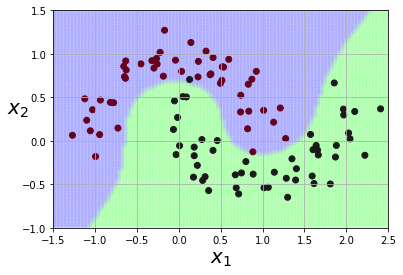

In [ ]:
## Getting 10,000 equilspaced data points in the domain
axes=[-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
XX = np.c_[x0.ravel(), x1.ravel()]
# predition 
# Note transformation is not required here, clf model will take care and do all the transformation throgh pipeline
y_pred = clf.predict(XX).reshape(x0.shape)
# Plottiing decision boundary
plt.scatter(x0, x1, c=y_pred,cmap=plt.cm.brg, alpha=0.05)
## Plotting original data points
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdGy)
plt.axis(axes)
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()

### Kernalized SVM
[Parameters inside SVM](https://scikit-learn.org/stable/modules/svm.html)
##### Training

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(X, y)
## Check with d=10, Coef0(r)=100,c=5: What differece did you notice?

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

##### Plotting

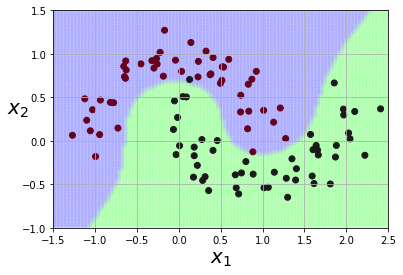

In [ ]:
## Getting 10,000 equilspaced data points in the domain
axes=[-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
XX = np.c_[x0.ravel(), x1.ravel()]
# predition 
# Note transformation is not required here, clf model will take care and do all the transformation
y_pred = clf.predict(XX).reshape(x0.shape)
# Plottiing decision boundary
plt.scatter(x0, x1, c=y_pred,cmap=plt.cm.brg, alpha=0.05)
## Plotting original data points
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdGy)
plt.axis(axes)
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()

#### Using ML extend for decision boundary visualization

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


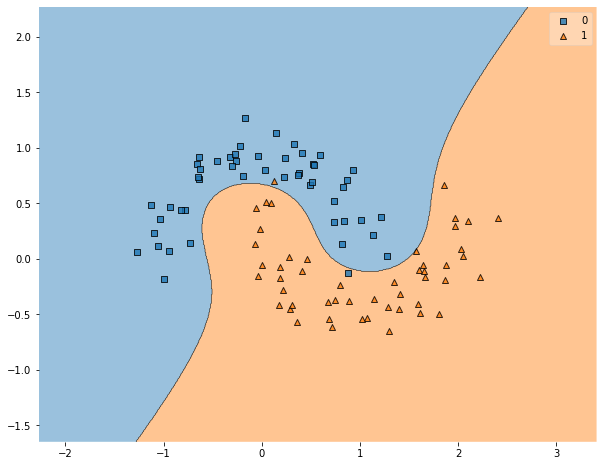

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(10,8))
plot_decision_regions(X=X, y=y, clf=poly_kernel_svm_clf, legend=1) 